# Boston crime dataset
> is a collection of crime incident reports that are provided by the [Boston Police Department (BPD)](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system). This dataset documents the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin from June of 2015.

## O.S.E.M.N. framework
All Machine Learning Projects and Data Science Projects have a basic framework named **[O.S.E.M.N](http://www.dataists.com/2010/09/a-taxonomy-of-data-science)**. (**O**btaining, **S**crubbing, **E**xploring, **M**odeling, I**N**terpreting), and we can see with framework Data Fetching, Data Cleaning, and Data Exploring takes up 60% of the pipeline.

In [1]:
import pandas as pd
import numpy as np
crime_data = pd.read_csv('data/crime.csv')

In [2]:
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
crime_data.shape

(319073, 17)

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [5]:
crime_data.loc[0]

INCIDENT_NUMBER                         I182070945
OFFENSE_CODE                                   619
OFFENSE_CODE_GROUP                         Larceny
OFFENSE_DESCRIPTION             LARCENY ALL OTHERS
DISTRICT                                       D14
REPORTING_AREA                                 808
SHOOTING                                       NaN
OCCURRED_ON_DATE               2018-09-02 13:00:00
YEAR                                          2018
MONTH                                            9
DAY_OF_WEEK                                 Sunday
HOUR                                            13
UCR_PART                                  Part One
STREET                                  LINCOLN ST
Lat                                      42.357791
Long                                    -71.139371
Location               (42.35779134, -71.13937053)
Name: 0, dtype: object

### Handle Missing Data

In [6]:
crime_data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [7]:
crime_data.SHOOTING.value_counts(dropna=False)

NaN    318054
Y        1019
Name: SHOOTING, dtype: int64

In [8]:
crime_data["SHOOTING"] = np.where(crime_data.SHOOTING=="Y", True, False)
crime_data.SHOOTING.value_counts(dropna=False)

False    318054
True       1019
Name: SHOOTING, dtype: int64

In [9]:
crime_data.STREET.value_counts(dropna=False)

WASHINGTON ST        14194
NaN                  10871
BLUE HILL AVE         7794
BOYLSTON ST           7221
DORCHESTER AVE        5149
                     ...  
MYLES STANDISH RD        1
ROLLINS PL               1
MCLELLAN                 1
EWER ST                  1
ELMHILL                  1
Name: STREET, Length: 4658, dtype: int64

In [10]:
crime_data.drop_duplicates(subset='INCIDENT_NUMBER', inplace=True, keep='first')
crime_data.shape

(282517, 17)

## Data Exploring
**[Exploratory Data Analysis (EDA)](https://www.itl.nist.gov/div898/handbook/eda/eda.htm.)** is an approach/philosophy to analyze a given data and derive information about the characteristics of the data using Graphical Visualizations like Box Plots, Scatter Plots, Histograms, etc. EDA is different from Initial Data Analysis (IDA). IDA primarily focused on Data Quality and Data Cleaning.

EDA can we further divided into the following categories:
- Univariate Feature Analysis
    -Distribution
    - Anomaly or Outlier Detection
- Multivariate Feature Analysis
    - Correlation
    - Dependence

### Univariate Feature Analysis
After cleaning the data, we need to visualize how the data looks and is distributed among the dataset. As the name suggests, “univariate” implies that we will be dealing with only one feature from the dataset.

- What is [Statistical Distribution](http://mathworld.wolfram.com/StatisticalDistribution.html)?
> Distribution in the most general and simple terms is, how the frequency of every unique observation looks over the sample space. We can have either a discrete distribution or a continuous distribution. Generally, we use a bar chart that is generated from a frequency table. A **discrete distribution** means that the observation has a countable (usually finite) number of values. In contrast, a **continuous distribution** means that the observation has an infinite (uncountable) number of different values. 

B2     43403
C11    37298
D4     36755
B3     31131
A1     31020
C6     21196
D14    18573
E18    15746
E13    15652
A7     12306
E5     11876
A15     5978
Name: DISTRICT, dtype: int64

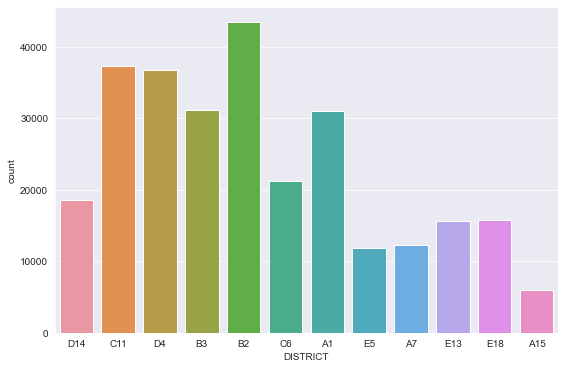

In [11]:
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 6))

sns.countplot(data=crime_data, x='DISTRICT', ax=ax)
crime_data.DISTRICT.value_counts()

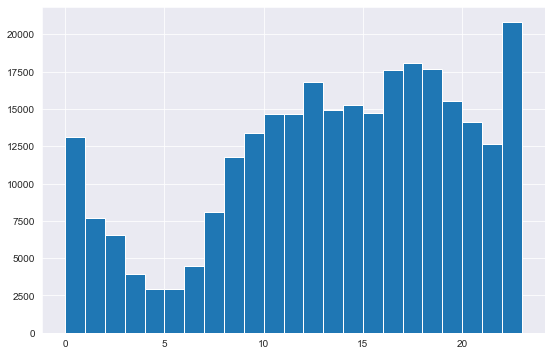

In [22]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(crime_data.HOUR, bins=23)
plt.show()

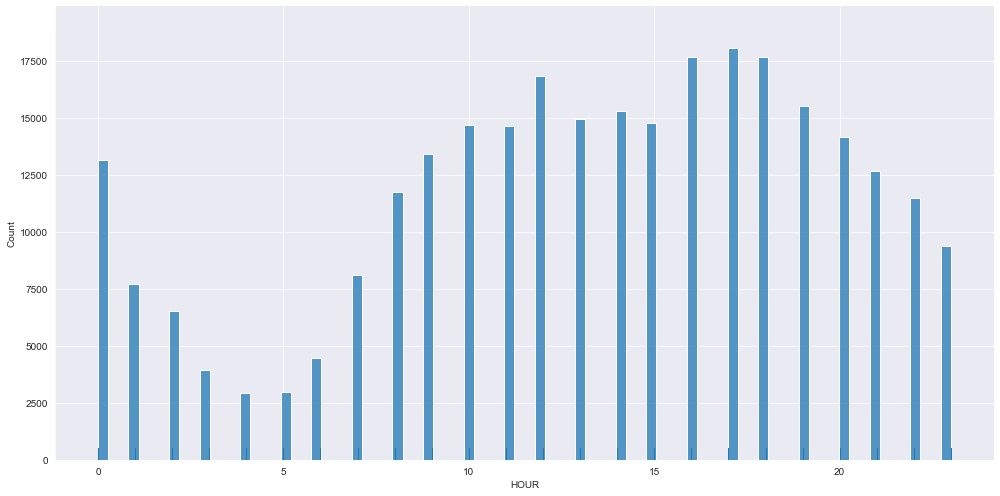

In [29]:
sns.displot(crime_data.HOUR, height=7, aspect=2, rug=True)